In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
from wordcloud import WordCloud

In [2]:
missing_data = '-'

In [3]:
db = pd.read_csv('ODI-2018_clean.csv')
db

,timestamp,programme,ML,IR,stat,DB,gender,chocolate,neighbours,stand,money,random,good(1),good(2),y_birth,m_birth,d_birth,h_bed,m_bed
0,4/5/2018 11:22:56,QRM,no,no,yes,no,male,neither,-,no,0.05,7,Productive,Good sleep,1994,10,12,0,0
1,4/5/2018 11:23:04,CS,no,no,-,yes,male,ignorant,-,yes,-,-,got a 8.5,got 2 8.5s,1993,6,8,0,0
2,4/5/2018 11:23:06,BA,yes,yes,no,yes,male,neither,5,no,-,6,Food,Sport,1992,12,25,14,27
3,4/5/2018 11:23:50,BA,yes,yes,yes,yes,male,ignorant,2,no,0.0,8,-,-,1995,1,2,0,0
4,4/5/2018 11:23:59,CS,no,no,no,yes,male,ignorant,6,no,0.0,8,sleep,beer,1994,9,1,-,-
5,4/5/2018 11:24:34,Drug Discovery and Safety,no,no,yes,no,male,fat,4,no,100.0,-,Chocolate,Doing nothing,1994,8,17,0,0
6,4/5/2018 11:25:25,CS,yes,yes,yes,no,male,neither,5,no,1.0,-,Chocolate,More chocolate,1993,9,27,9,0
7,4/5/2018 11:25:25,CLS,no,no,yes,yes,male,fat,5,yes,0.25,3,Sunshine,Friends,1994,5,14,0,0
8,4/5/2018 11:25:36,EOR,no,no,yes,no,male,neither,2,no,0.25,-,Sun,Rain,-,11,4,0,0
9,4/5/2018 11:25:51,Bioinformatics,yes,yes,-,yes,male,slim,7,no,0.3,5,Free time,More free time,1993,8,19,1,0


In [4]:
# data set with all rows dropped that include missing data
print(db.replace(missing_data, np.nan).isnull().any())
db_reduced = db.replace(missing_data, np.nan).dropna()

timestamp     False
programme      True
ML             True
IR             True
stat           True
DB             True
gender         True
chocolate      True
neighbours     True
stand          True
money          True
random         True
good(1)        True
good(2)        True
y_birth        True
m_birth        True
d_birth        True
h_bed          True
m_bed          True
dtype: bool


In [5]:
db_reduced.money.astype(np.float).describe()

count     85.000000
mean      20.216153
std       32.279403
min        0.000000
25%        0.500000
50%        2.000000
75%       25.000000
max      100.000000
Name: money, dtype: float64

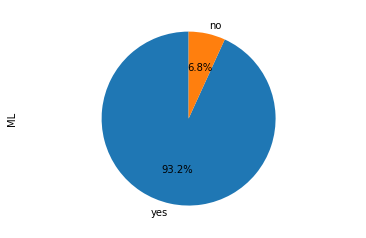

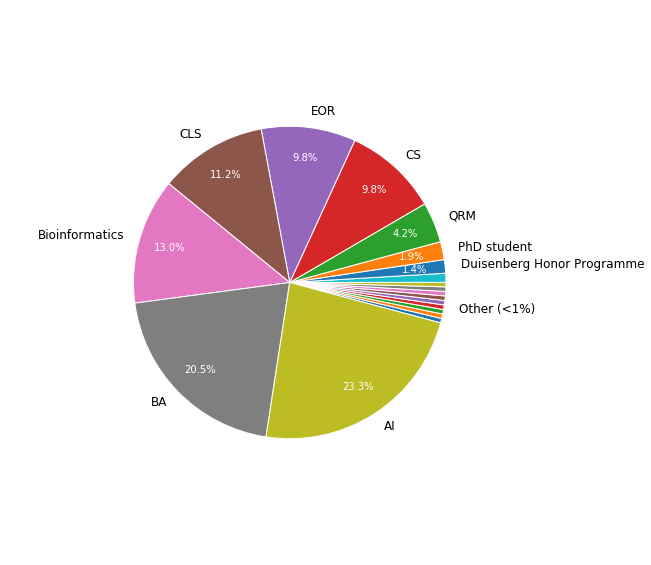

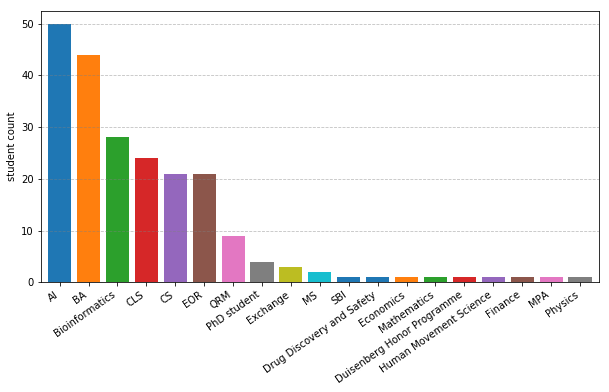

In [6]:
plt.figure()
plt.axis("equal")
db[db.programme == 'BA'].ML.value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, shadow=False, legend=False)
plt.show()

programmes = db.programme[db.programme != missing_data]
labels = ['Physics', 'Drug Discovery and Safety', 'Human Movement Science',
          'Other (<1%)' ,'SBI','MPA','Finance','Economics','MS','Exchange',
          'Duisenberg Honor Programme','PhD student','QRM','CS','EOR','CLS',
          'Bioinformatics' , 'BA', 'AI']
'''
plt.axis("equal")
programmes.value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, shadow=False, legend=False)
plt.show()
'''
fig = plt.figure(figsize=[10, 10])
plt.axis("equal")
patches, texts, autotexts = plt.pie(programmes.value_counts().sort_values(ascending=True),labels=labels,
                             startangle=-15,labeldistance=1.1, autopct='%1.1f%%',pctdistance=0.8,
                                   radius=0.7)
for patch in patches:
    patch.set_edgecolor('white')
for t in texts:
    t.set_size('larger')
for i,t in enumerate(autotexts):
    if float(t.get_text()[:-1]) <1:
        t.set_alpha(0)#.set_size('xx-small')
        texts[i].set_alpha(0)
    if texts[i].get_text() == 'Other (<1%)':
        texts[i].set_alpha(1)
    t.set_color('white')
autotexts[0].set_color('y')
plt.savefig('figures/piechart_programs.pdf', bbox_inches='tight')
plt.show()

plt.figure(figsize=(10,5))
ax = programmes.value_counts().plot(kind='bar', width=0.8)
ax.grid(color='gray', linestyle='--', axis='y', alpha=0.5)
ax.set_ylabel('student count')
plt.xticks(ax.get_xticks(), rotation=35, ha='right')
plt.savefig('figures/barchart_programs.pdf', bbox_inches='tight')
plt.show()

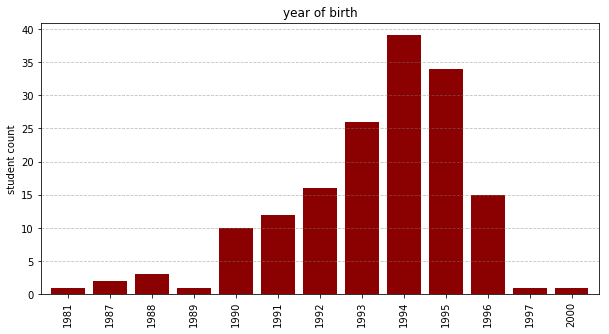

In [7]:
plt.figure(figsize=(10,5))
years = db.y_birth[db.y_birth != missing_data]
hist_years = years.value_counts().sort_index()
ax = hist_years.plot(kind='bar', width=0.8, color='darkred', title='year of birth')
ax.grid(color='gray', linestyle='--', axis='y', alpha=0.5)
ax.set_ylabel('student count')
plt.show()

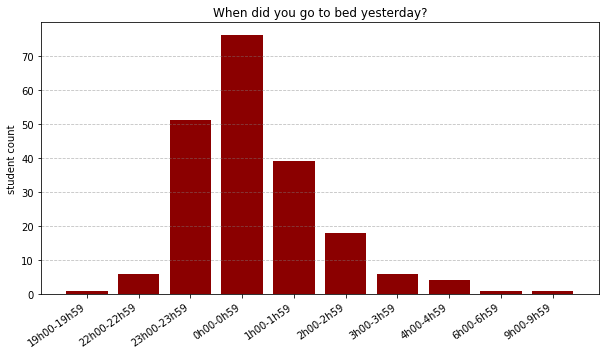

In [8]:
plt.figure(figsize=(10,5))
hours = db.h_bed[db.h_bed != missing_data].astype('float')
#ax = hours.value_counts().sort_index().plot(kind='bar', width=0.8, color='darkred', title='When did you go to bed yesterday?')
hist_hours = hours.value_counts().sort_index().tolist()
for _ in range(3):
    remove_item = hist_hours.pop()
    hist_hours.insert(0, remove_item)

hours = ['19h00-19h59','22h00-22h59','23h00-23h59','0h00-0h59','1h00-1h59','2h00-2h59','3h00-3h59',
                    '4h00-4h59','6h00-6h59','9h00-9h59']

plt.bar(hours,hist_hours, color='darkred')
plt.grid(color='gray', linestyle='--', axis='y', alpha=0.5)
plt.ylabel('student count')
plt.xticks(hours, rotation=35, ha='right')
plt.title('When did you go to bed yesterday?')
plt.show()

In [43]:
money_programme = pd.DataFrame(db[['programme','money']], columns=['programme','money'])
money_programme = money_programme.replace(missing_data, np.nan)
money_programme.money = money_programme.money.apply(lambda x: x if float(x)<1000 else np.nan)
delete_progs = ['Human Movement Science', 'MS','Finance','PhD student', 'Economics','Mathematics', 'MPA',
               'SBI','Drug Discovery and Safety', 'Duisenberg Honor Programme', 'Exchange','QRM']
money_programme.programme = money_programme.programme.apply(lambda x: np.nan if x in delete_progs else x)
money_programme.dropna(inplace=True)

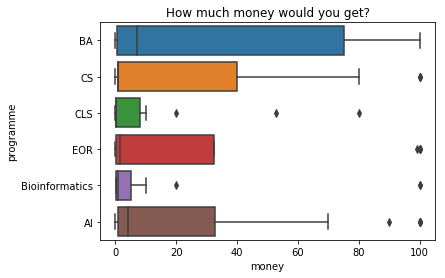

In [44]:
#money = db_reduced.money.astype(np.float)
#h_bed = db_reduced.h_bed.astype(np.float)
money = money_programme.money.astype(np.float)
programme = money_programme.programme

ax = sb.boxplot(y=programme, x=money)
plt.title('How much money would you get?')
plt.savefig('figures/money.pdf', bbox_inches='tight')
plt.show()
#plt.xticks(ax.get_xticks(), rotation=35, ha='right')

In [11]:
money_ML = pd.DataFrame(db[['ML','money']], columns=['ML','money'])
money_ML = money_ML.replace(missing_data, np.nan)
money_ML.money = money_ML.money.apply(lambda x: x if float(x)<1000 else np.nan)
money_ML.dropna(inplace=True)

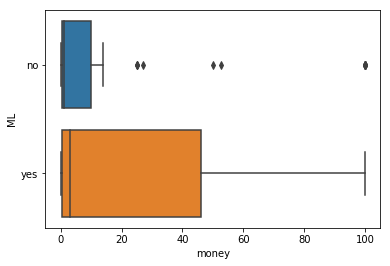

In [12]:
ax = sb.boxplot(y=money_ML.ML, x=money_ML.money.astype(np.float))
plt.savefig('figures/ML_vs_money.pdf', bbox_inches='tight')
plt.show()

In [13]:
money_DB = pd.DataFrame(db[['DB','money']], columns=['DB','money'])
money_DB = money_DB.replace(missing_data, np.nan)
money_DB.money = money_DB.money.apply(lambda x: x if float(x)<1000 else np.nan)
money_DB.dropna(inplace=True)

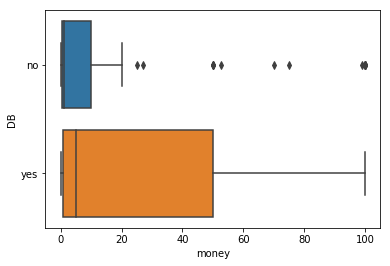

In [14]:
ax = sb.boxplot(y=money_DB.DB, x=money_DB.money.astype(np.float))
plt.savefig('figures/DB_vs_money.pdf', bbox_inches='tight')
plt.show()

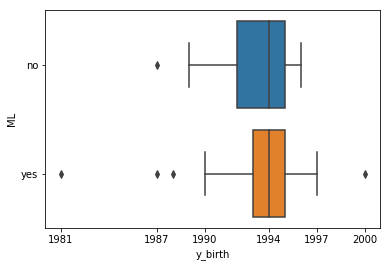

In [15]:
birth_ML = pd.DataFrame(db[['ML','y_birth']], columns=['ML','y_birth'])
birth_ML = birth_ML.replace(missing_data, np.nan).dropna()
ax = sb.boxplot(y=birth_ML.ML, x=birth_ML.y_birth.astype(np.int))
#plt.xticks(np.sort(birth_ML.y_birth.unique().astype(np.int)))
plt.xticks([1981,1987,1990,1994, 1997, 2000])
plt.show()

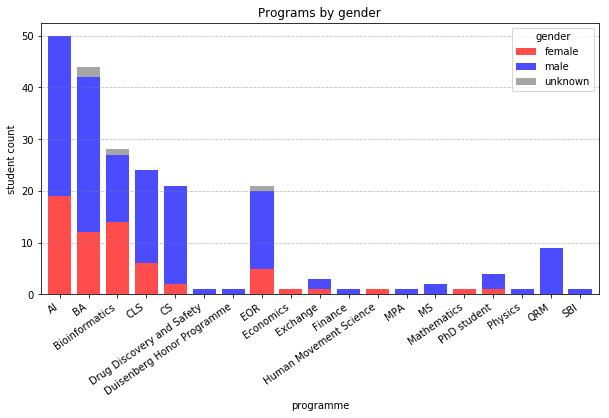

In [16]:
programme_gender_ct = pd.crosstab(db.programme.replace(missing_data, np.nan),
                                  db.gender.replace(missing_data, 'unknown'))

cmap = matplotlib.colors.ListedColormap(["red","blue","gray"], name='from_list', N=None)
ax = programme_gender_ct.dropna().plot(kind='bar', width=0.8, stacked=True, cmap=cmap, alpha=0.7, figsize=(10,5))
ax.grid(color='gray', linestyle='--', axis='y', alpha=0.5)
ax.set_ylabel('student count')
plt.xticks(ax.get_xticks(), rotation=35, ha='right')
plt.title('Programs by gender')
plt.savefig('figures/programs_by_gender.pdf', bbox_inches='tight')
plt.show()

In [17]:
programme_gender_ct

gender,female,male,unknown
programme,,,
AI,19,31,0
BA,12,30,2
Bioinformatics,14,13,1
CLS,6,18,0
CS,2,19,0
Drug Discovery and Safety,0,1,0
Duisenberg Honor Programme,0,1,0
EOR,5,15,1
Economics,1,0,0


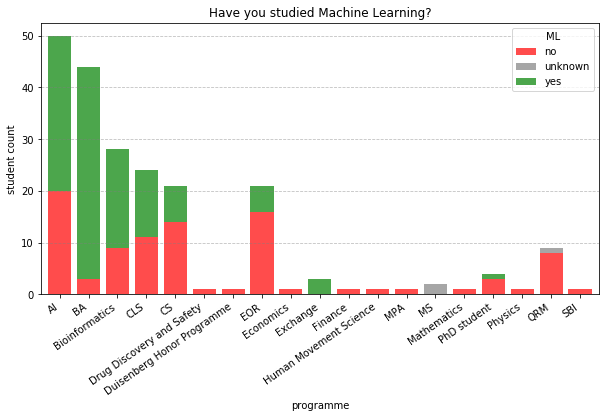

In [18]:
programme_ML_ct = pd.crosstab(db.programme.replace(missing_data, np.nan), db.ML.replace(missing_data, 'unknown'))

cmap = matplotlib.colors.ListedColormap(["red","gray","green"], name='from_list', N=None)
ax = programme_ML_ct.dropna().plot(kind='bar', width=0.8, stacked=True, cmap=cmap, alpha=0.7, figsize=(10,5))
ax.grid(color='gray', linestyle='--', axis='y', alpha=0.5)
ax.set_ylabel('student count')
plt.xticks(ax.get_xticks(), rotation=35, ha='right')
plt.title('Have you studied Machine Learning?')
plt.savefig('figures/ML_vs_program.pdf', bbox_inches='tight')
plt.show()


In [19]:
gender_ML_corr = pd.DataFrame(db[['gender','ML']].replace(missing_data, np.nan).dropna(), columns=['gender','ML'])
gender_ML_corr['ML'].replace('yes',1,inplace=True)
gender_ML_corr['ML'].replace('no',0,inplace=True)

gender_ML_corr.groupby(['gender'], as_index=False).mean().sort_values(by='ML',ascending=False)

,gender,ML
1,male,0.557823
0,female,0.539683


In [20]:
DB_ML_corr = pd.DataFrame(db[['DB','ML']].replace(missing_data, np.nan).dropna(), columns=['DB','ML'])
DB_ML_corr['ML'].replace('yes',1,inplace=True)
DB_ML_corr['ML'].replace('no',0,inplace=True)

DB_ML_corr.groupby(['DB'], as_index=False).mean().sort_values(by='ML',ascending=False)

,DB,ML
1,yes,0.730769
0,no,0.423077


In [21]:
stat_ML_corr = pd.DataFrame(db[['stat','ML']].replace(missing_data, np.nan).dropna(), columns=['stat','ML'])
stat_ML_corr['ML'].replace('yes',1,inplace=True)
stat_ML_corr['ML'].replace('no',0,inplace=True)

stat_ML_corr.groupby(['stat'], as_index=False).mean().sort_values(by='ML',ascending=False)

,stat,ML
0,no,0.565217
1,yes,0.564516


In [22]:
IR_ML_corr = pd.DataFrame(db[['IR','ML']].replace(missing_data, np.nan).dropna(),columns=['IR','ML'])
IR_ML_corr['ML'].replace('yes',1,inplace=True)
IR_ML_corr['ML'].replace('no',0,inplace=True)

IR_ML_corr.groupby(['IR'], as_index=False).mean().sort_values(by='ML',ascending=False)

,IR,ML
1,yes,0.876543
0,no,0.369231


In [23]:
from collections import Counter
import operator
from nltk.stem import PorterStemmer
import nltk
from nltk.corpus import stopwords

gender_word = pd.DataFrame(db[['gender','good(1)','good(2)']].replace(missing_data,np.nan).dropna())
gender_word["good_all"] = gender_word['good(1)']+' ' + gender_word['good(2)']
male_word = gender_word[gender_word.gender=='male']
male_word = male_word.assign(good_all= male_word['good_all'].str.lower())
female_word = gender_word[gender_word.gender=='female']
female_word = female_word.assign(good_all= female_word['good_all'].str.lower())



In [24]:
m_result = Counter(" ".join(male_word['good_all'].values.tolist()).split(" ")).items()
m_filtered_words = {}
m_set = set()
for key, value in m_result:
    if key and key!='good' and key!='day' and key not in stopwords.words('english'):
        m_filtered_words.update({key: value})
        if value > 6 and len(m_set) < 10:
            m_set.update({key})
print(m_set, len(m_set))
sorted(m_filtered_words.items(), key=operator.itemgetter(1), reverse=True)[:10]

{'sun', 'sex', 'time', 'weather', 'sleep', 'food', 'coffee', 'sports', 'beer', 'nice'} 10


[('food', 35),
 ('sleep', 21),
 ('sun', 13),
 ('coffee', 12),
 ('weather', 11),
 ('sex', 11),
 ('beer', 10),
 ('sports', 7),
 ('time', 7),
 ('nice', 7)]

In [25]:
f_result = Counter(" ".join(female_word['good_all'].values.tolist()).split(" ")).items()
f_filtered_words = {}
f_set = set()
for key, value in f_result:
    if key and key!='good' and key!='day' and key not in stopwords.words('english'):
        f_filtered_words.update({key: value})
        if value > 3 and len(f_set) < 10:
            f_set.update({key})
print(f_set, len(f_set))
f_list = sorted(f_filtered_words.items(), key=operator.itemgetter(1), reverse=True)[:11]
f_list

{'sun', 'sunshine', 'people', 'sunny', 'weather', 'sleep', 'food', 'coffee', 'free', 'friends'} 10


[('food', 14),
 ('sun', 13),
 ('coffee', 10),
 ('weather', 10),
 ('sleep', 9),
 ('nice', 9),
 ('sunshine', 8),
 ('friends', 5),
 ('free', 4),
 ('people', 4),
 ('sunny', 4)]

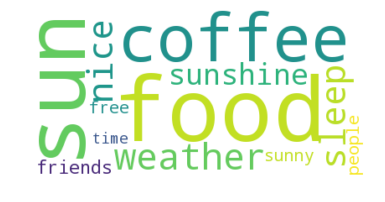

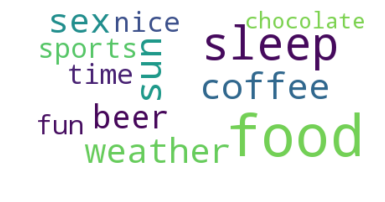

In [26]:
wordcloud = WordCloud(background_color="white", max_words=12).generate_from_frequencies(f_filtered_words)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# lower max_font_size
wordcloud = WordCloud(background_color="white", max_words=12).generate_from_frequencies(m_filtered_words)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [27]:
print(f_set.difference(m_set))
print(m_set.difference(f_set))
print(m_set.intersection(f_set))

{'sunshine', 'people', 'friends', 'free', 'sunny'}
{'sex', 'sports', 'beer', 'nice', 'time'}
{'sun', 'sleep', 'coffee', 'weather', 'food'}


In [28]:
choc_gender_corr = pd.DataFrame(db[['gender','chocolate']].replace(missing_data, np.nan).dropna(), columns=['gender'
                                                                                                            ,'chocolate'])

choc_female = choc_gender_corr[choc_gender_corr.gender =='female'].groupby("chocolate", as_index=False).count()
choc_female = choc_female.rename(columns={"gender":"female"})
total_females = choc_female.female.sum()
choc_female = choc_female.assign(percent=choc_female.female/total_females)
choc_female

,chocolate,female,percent
0,fat,24,0.380952
1,ignorant,17,0.269841
2,neither,18,0.285714
3,slim,4,0.063492


In [29]:
choc_male = choc_gender_corr[choc_gender_corr.gender =='male'].groupby("chocolate", as_index=False).count()
choc_male = choc_male.rename(columns={"gender" : "male"})
total_males = choc_male.male.sum()
choc_male = choc_male.assign(percent=choc_male.male/total_males)
choc_male

,chocolate,male,percent
0,fat,48,0.324324
1,ignorant,39,0.263514
2,neither,51,0.344595
3,slim,10,0.067568


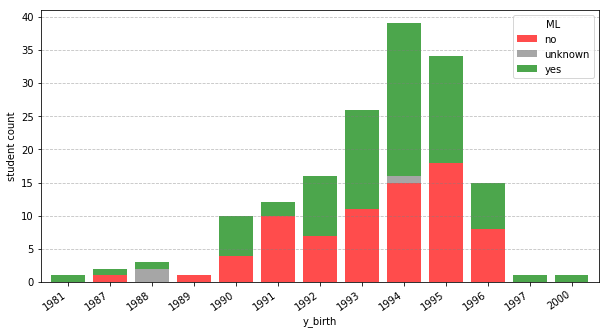

In [30]:
birth_ML_ct = pd.crosstab(db.y_birth.replace(missing_data, np.nan), db.ML.replace(missing_data, 'unknown'))

cmap = matplotlib.colors.ListedColormap(["red","gray","green"], name='from_list', N=None)
ax = birth_ML_ct.dropna().plot(kind='bar', width=0.8, stacked=True, cmap=cmap, alpha=0.7, figsize=(10,5))
ax.grid(color='gray', linestyle='--', axis='y', alpha=0.5)
ax.set_ylabel('student count')
plt.xticks(ax.get_xticks(), rotation=35, ha='right')
plt.show()

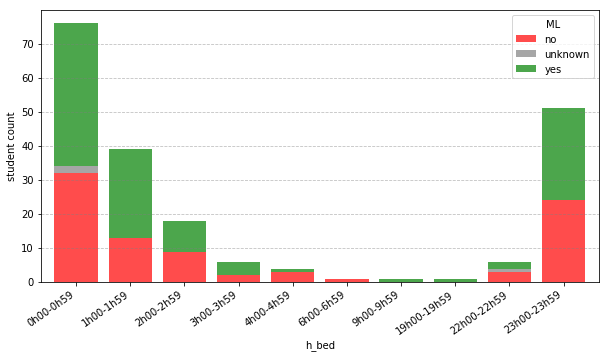

In [31]:
bedtime_ML_ct = pd.crosstab(db.h_bed.replace(missing_data, np.nan).astype('float'), db.ML.replace(missing_data, 'unknown')).dropna()

cmap = matplotlib.colors.ListedColormap(["red","gray","green"], name='from_list', N=None)
ax = bedtime_ML_ct.plot(kind='bar', width=0.8, stacked=True, cmap=cmap, alpha=0.7, figsize=(10,5))
ax.grid(color='gray', linestyle='--', axis='y', alpha=0.5)
ax.set_ylabel('student count')
plt.xticks(ax.get_xticks(), rotation=35, ha='right')
ax.set_xticklabels(['0h00-0h59','1h00-1h59','2h00-2h59','3h00-3h59','4h00-4h59','6h00-6h59','9h00-9h59','19h00-19h59','22h00-22h59','23h00-23h59'], rotation=35, ha='right')
plt.show()

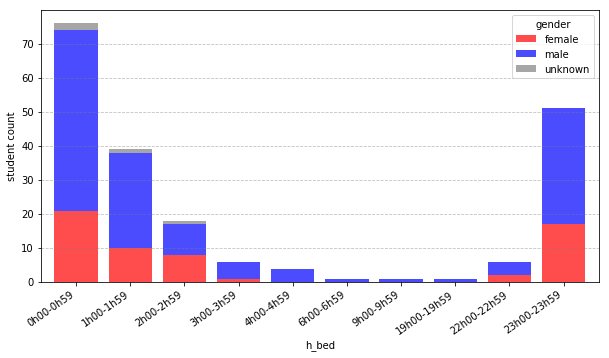

In [32]:
bedtime_gender_ct = pd.crosstab(db.h_bed.replace(missing_data, np.nan).astype('float'), db.gender.replace(missing_data, 'unknown')).dropna()

cmap = matplotlib.colors.ListedColormap(["red","blue","gray"], name='from_list', N=None)
ax = bedtime_gender_ct.plot(kind='bar', width=0.8, stacked=True, cmap=cmap, alpha=0.7, figsize=(10,5))
ax.grid(color='gray', linestyle='--', axis='y', alpha=0.5)
ax.set_ylabel('student count')
plt.xticks(ax.get_xticks(), rotation=35, ha='right')
ax.set_xticklabels(['0h00-0h59','1h00-1h59','2h00-2h59','3h00-3h59','4h00-4h59','6h00-6h59','9h00-9h59','19h00-19h59','22h00-22h59','23h00-23h59'], rotation=35, ha='right')
plt.show()

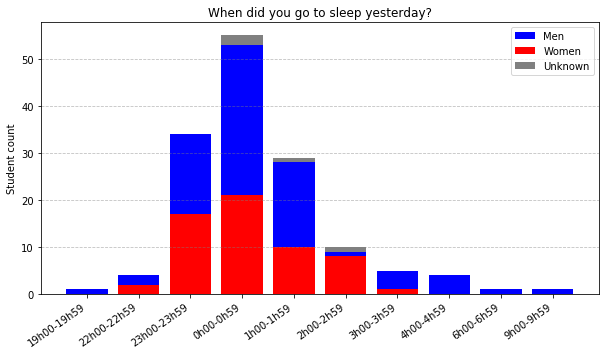

In [33]:
bedtime_gender_ct = pd.crosstab(db.h_bed.replace(missing_data, np.nan).astype('float'), 
                                db.gender.replace(missing_data, 'unknown')).dropna()
plt.figure(figsize=(10,5))
hours = ['19h00-19h59','22h00-22h59','23h00-23h59','0h00-0h59','1h00-1h59','2h00-2h59','3h00-3h59',
                    '4h00-4h59','6h00-6h59','9h00-9h59']

males = bedtime_gender_ct.male.tolist()
females = bedtime_gender_ct.female.tolist()
unknowns = bedtime_gender_ct.unknown.tolist()
for _ in range(3):
    m, f, u = males.pop(), females.pop(), unknowns.pop()
    males.insert(0, m)
    females.insert(0,f)
    unknowns.insert(0,u)
    

p1 = plt.bar(hours, males,  color='blue')
p2 = plt.bar(hours, females, color='red')
p3 = plt.bar(hours, unknowns, color = 'gray', bottom=males)
plt.ylabel('Student count')
plt.title('When did you go to sleep yesterday?')
plt.xticks(hours,rotation=35, ha='right')
plt.legend((p1[0], p2[0], p3[0]), ('Men', 'Women','Unknown'))
plt.grid(color='gray', linestyle='--', axis='y', alpha=0.5)
plt.savefig('figures/sleep_by_gender.pdf', bbox_inches='tight')
plt.show()

In [34]:
db['ML_binary'] = db.ML.map({'yes':1, 'no':0})
db['moneyBins'] = pd.qcut(db['money'], 3, np.arange(3))
db[['moneyBins','ML_binary']].groupby(['moneyBins'], as_index=False).mean().sort_values(by='ML_binary',ascending=False)

,moneyBins,ML_binary
2,2,0.677419
0,0,0.546667
1,1,0.480519


In [35]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

features1 = ['programme','DB','y_birth']
features2 = ['programme','DB','stat','gender']
features3 = ['programme','h_bed','y_birth']
features4 = ['programme','DB','IR','moneyBins']
target1 = 'ML'
target3 = 'gender'

features = features4
target = target1

columns = np.append(features, target)
classification_data = pd.DataFrame(db[columns].replace(missing_data, np.nan).dropna(), columns=columns)

# transform features to numerical categories
le = preprocessing.LabelEncoder()
for c in columns:
    classification_data[c] = le.fit_transform(classification_data[c])
    print(list(le.classes_))
    
# encode categorial features as multiple binary features
enc = preprocessing.OneHotEncoder()
binary_features = enc.fit_transform(classification_data[features])

['AI', 'BA', 'Bioinformatics', 'CLS', 'CS', 'Drug Discovery and Safety', 'Duisenberg Honor Programme', 'EOR', 'Economics', 'Exchange', 'Finance', 'Human Movement Science', 'MPA', 'Mathematics', 'PhD student', 'Physics', 'QRM', 'SBI']
['no', 'yes']
['no', 'yes']
[0, 1, 2]
['no', 'yes']


In [36]:
clf1 = DecisionTreeClassifier(random_state=0)
clf2 = LogisticRegression(random_state=0)
clf3 = RandomForestClassifier(random_state=0)
clf_list = [clf1, clf2, clf3]

for clf in clf_list:
    # compute model and perform 10-fold cross valdation (using the numerical features)
    scores = cross_val_score(clf, classification_data[features], classification_data[target], cv=10)
    print("cross-val scores:", scores)
    print("mean = ", np.mean(scores), ", std = ", np.std(scores), "\n")

    # compute model and perform 10-fold cross valdation (using the binary features)
    scores = cross_val_score(clf, binary_features, classification_data[target], cv=10)
    print("cross-val scores:", scores)
    print("mean = ", np.mean(scores), ", std = ", np.std(scores), "\n")

cross-val scores: [0.71428571 0.71428571 0.80952381 0.66666667 0.76190476 0.71428571
 0.7        0.8        0.57894737 0.73684211]
mean =  0.7196741854636592 , std =  0.06300108332718468 

cross-val scores: [0.71428571 0.61904762 0.76190476 0.71428571 0.76190476 0.76190476
 0.75       0.85       0.57894737 0.68421053]
mean =  0.7196491228070176 , std =  0.0738242620736445 

cross-val scores: [0.80952381 0.85714286 0.80952381 0.71428571 0.71428571 0.71428571
 0.6        0.7        0.47368421 0.68421053]
mean =  0.7076942355889725 , std =  0.10496341438116914 

cross-val scores: [0.76190476 0.85714286 0.80952381 0.80952381 0.71428571 0.80952381
 0.7        0.85       0.57894737 0.78947368]
mean =  0.7680325814536342 , std =  0.07974428611124539 

cross-val scores: [0.76190476 0.76190476 0.71428571 0.61904762 0.76190476 0.71428571
 0.6        0.7        0.63157895 0.68421053]
mean =  0.6949122807017544 , std =  0.05755862136333841 

cross-val scores: [0.76190476 0.71428571 0.76190476 0.66

In [37]:
# Logistic Regression parameter tuning
# C: small values result in simple (underfitting) models, large values in complex (overfitting) models

#C_values = [0.5, 1, 1.5, 2, 2.5]
C_values = np.linspace(0.25, 8, 30)
mean_scores = []
for C in C_values:
    clf = LogisticRegression(C=C)
    print('C = ',C)
    # compute model and perform 10-fold cross valdation (using the binary features)
    scores = cross_val_score(clf, binary_features, classification_data[target], cv=10)
    print("cross-val scores:", scores)
    print("mean = ", np.mean(scores), ", std = ", np.std(scores), "\n")
    mean_scores.append(np.mean(scores))

C =  0.25
cross-val scores: [0.76190476 0.85714286 0.85714286 0.76190476 0.71428571 0.80952381
 0.65       0.85       0.57894737 0.78947368]
mean =  0.7630325814536341 , std =  0.08785210140433482 

C =  0.5172413793103448
cross-val scores: [0.76190476 0.85714286 0.80952381 0.80952381 0.71428571 0.80952381
 0.7        0.85       0.57894737 0.78947368]
mean =  0.7680325814536342 , std =  0.07974428611124539 

C =  0.7844827586206896
cross-val scores: [0.76190476 0.85714286 0.80952381 0.80952381 0.71428571 0.80952381
 0.7        0.85       0.57894737 0.78947368]
mean =  0.7680325814536342 , std =  0.07974428611124539 

C =  1.0517241379310345
cross-val scores: [0.76190476 0.85714286 0.80952381 0.80952381 0.71428571 0.80952381
 0.7        0.85       0.57894737 0.78947368]
mean =  0.7680325814536342 , std =  0.07974428611124539 

C =  1.3189655172413792
cross-val scores: [0.76190476 0.85714286 0.80952381 0.80952381 0.71428571 0.80952381
 0.7        0.85       0.57894737 0.78947368]
mean = 

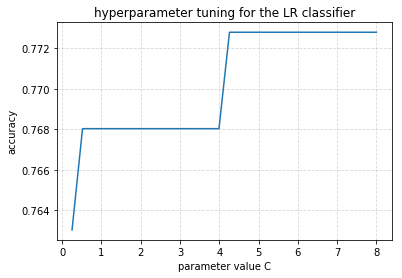

In [38]:
plt.figure()
plt.plot(C_values, mean_scores)
plt.xlabel('parameter value C')
plt.ylabel('accuracy')
plt.title('hyperparameter tuning for the LR classifier')
plt.grid(color='gray',alpha=0.3, linestyle='--')
#plt.savefig('titanic_LRtuning.pdf',bbox_inches='tight')